In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

import sys
sys.path.insert(0, "../utils")
import bootcampviztools as viz
import ToolBox as tb


from scipy.io import arff

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

### **1. Cargar los datos**

In [60]:
data, meta = arff.loadarff("../data_sample/speed_dating.arff") # Cargo directamente por separado los datos en forma de array y los metadatos proporcionados
meta

Dataset: 'Speed
	has_null's type is nominal, range is ('0', '1')
	wave's type is numeric
	gender's type is nominal, range is ('female', 'male')
	age's type is numeric
	age_o's type is numeric
	d_age's type is numeric
	d_d_age's type is nominal, range is ('[4-6]', '[0-1]', '[2-3]', '[7-37]')
	race's type is nominal, range is ('Asian/Pacific Islander/Asian-American', 'European/Caucasian-American', 'Other', 'Latino/Hispanic American', 'Black/African American')
	race_o's type is nominal, range is ('European/Caucasian-American', 'Asian/Pacific Islander/Asian-American', 'Latino/Hispanic American', 'Other', 'Black/African American')
	samerace's type is nominal, range is ('0', '1')
	importance_same_race's type is numeric
	importance_same_religion's type is numeric
	d_importance_same_race's type is nominal, range is ('[2-5]', '[6-10]', '[0-1]')
	d_importance_same_religion's type is nominal, range is ('[2-5]', '[0-1]', '[6-10]')
	field's type is nominal, range is ('Law', 'law', 'Economics', 'Mas

In [61]:
data

array([(b'0',  1., b'female', 21., 27., 6., b'[4-6]', b'Asian/Pacific Islander/Asian-American', b'European/Caucasian-American', b'0', 2., 4., b'[2-5]', b'[2-5]', b'Law', 35., 20., 20., 20.,  0.,  5., b'[21-100]', b'[16-20]', b'[16-20]', b'[16-20]', b'[0-15]', b'[0-15]',  6.,  8.,  8.,  8.,  8.,  6., b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', 15., 20., 20., 15., 15., 15., b'[0-15]', b'[16-20]', b'[16-20]', b'[0-15]', b'[0-15]', b'[0-15]', 6., 8., 8., 8., 7., b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', 6., 9., 7., 7.,  6.,  5., b'[6-8]', b'[9-10]', b'[6-8]', b'[6-8]', b'[6-8]', b'[0-5]', 9., 2., 8.,  9.,  1.,  1., 5., 1., 5., 6., 9., 1., 10., 10.,  9., 8., 1., b'[9-10]', b'[0-5]', b'[6-8]', b'[9-10]', b'[0-5]', b'[0-5]', b'[0-5]', b'[0-5]', b'[0-5]', b'[6-8]', b'[9-10]', b'[0-5]', b'[9-10]', b'[9-10]', b'[9-10]', b'[6-8]', b'[0-5]',  0.14, b'[0-0.33]',  3.,  2., 4., b'[0-4]', b'[0-3]', b'[3-5]', 7.,  6., b'[6-8]', b'[5-6]', 0., b'1', b'0', b'0'),
       (b'0',  1.,

In [62]:
pd.set_option("display.max_columns", None)
df = pd.DataFrame(data)
df

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'0',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'0',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'1',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.0,18.0,19.0,18.0,14.0,12.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8

Todas las variables que originalmente son de tipo "object", infiere que son de tipo "bytes".

### **3. Train, validation, test**

In [63]:
target = "match" # Todavía no voy a separar X e y, pero me guardo el target en una variable

In [64]:
train, val_test = train_test_split(df, test_size= 0.4, random_state=42) # Me quedo con un test del 40% de los datos para luego sacar el conjunto de validación de ahí
val, test = train_test_split(val_test, test_size= 0.5, random_state=42)

In [65]:
sets_names = ["Train", "Validation", "Test"]
sets = [train, val, test]

In [66]:
for set, set_name in zip(sets, sets_names):
    print(f"Dimensiones de {set_name}: {set.shape}")

Dimensiones de Train: (5026, 123)
Dimensiones de Validation: (1676, 123)
Dimensiones de Test: (1676, 123)


### **4. Target**

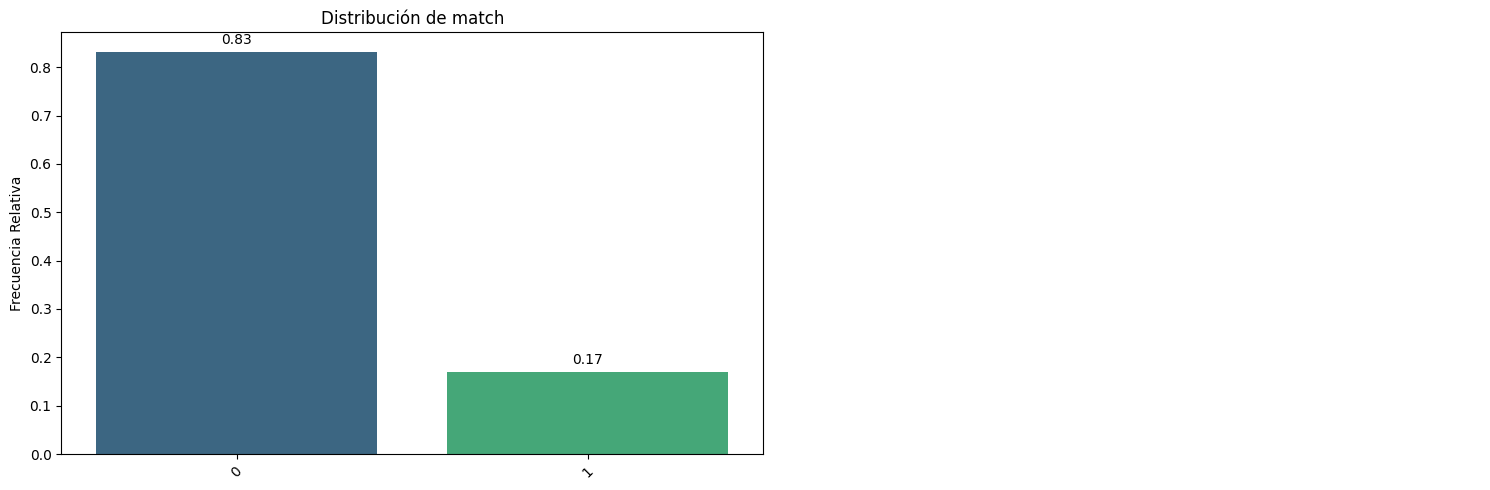

In [67]:
viz.pinta_distribucion_categoricas(train, [target], mostrar_valores=True, relativa=True)

Muy desbalanceado, probaré con las métricas adecuadas para tenerlos en cuenta, el argumento *class_weight* y una reducción de muestras, quizá para que quede un 66 - 34% en vez de un target tan desbalanceado. Me quedaré con la técnica o combinación de técnicas que mejor funcione.

### **5. Entender las variables**

Para hacerme una idea general utilizaré los metadatos y la descripción de ciertas variables concretas.

In [68]:
meta

Dataset: 'Speed
	has_null's type is nominal, range is ('0', '1')
	wave's type is numeric
	gender's type is nominal, range is ('female', 'male')
	age's type is numeric
	age_o's type is numeric
	d_age's type is numeric
	d_d_age's type is nominal, range is ('[4-6]', '[0-1]', '[2-3]', '[7-37]')
	race's type is nominal, range is ('Asian/Pacific Islander/Asian-American', 'European/Caucasian-American', 'Other', 'Latino/Hispanic American', 'Black/African American')
	race_o's type is nominal, range is ('European/Caucasian-American', 'Asian/Pacific Islander/Asian-American', 'Latino/Hispanic American', 'Other', 'Black/African American')
	samerace's type is nominal, range is ('0', '1')
	importance_same_race's type is numeric
	importance_same_religion's type is numeric
	d_importance_same_race's type is nominal, range is ('[2-5]', '[6-10]', '[0-1]')
	d_importance_same_religion's type is nominal, range is ('[2-5]', '[0-1]', '[6-10]')
	field's type is nominal, range is ('Law', 'law', 'Economics', 'Mas

*Se ve que hay bastantes variables binarias, parece que hay algunas continuas y discretas y algunas otras categóricas y categóricas creadas a partir de numéricas.*

In [69]:
with open("../data_sample/feature_information.txt", "r") as open_file:
    all_text = open_file.read()
    print(all_text)

 * gender: Gender of self  
 * age: Age of self  
 * age_o: Age of partner  
 * d_age: Difference in age  
 * race: Race of self  
 * race_o: Race of partner  
 * samerace: Whether the two persons have the same race or not.  
 * importance_same_race: How important is it that partner is of same race?  
 * importance_same_religion: How important is it that partner has same religion?  
 * field: Field of study  
 * pref_o_attractive: How important does partner rate attractiveness  
 * pref_o_sinsere: How important does partner rate sincerity  
 * pref_o_intelligence: How important does partner rate intelligence  
 * pref_o_funny: How important does partner rate being funny  
 * pref_o_ambitious: How important does partner rate ambition  
 * pref_o_shared_interests: How important does partner rate having shared interests  
 * attractive_o: Rating by partner (about me) at night of event on attractiveness  
 * sincere_o: Rating by partner (about me) at night of event on sincerity  
 * intell

Las variables que tienen "\_o" hacen referencia a la otra persona, las que tienen "d\_" y tienen un rango de valores (no un solo valor numérico) a la variable categórica creada a partir de la numérica con el mismo nombre quitando la "d\_". Además hay variables que tenemos que descartar porque no las vamos a conocer cuando hagamos las predicciones de las citas que no se han producido todavía.

In [70]:
for ds in [train, val, test]:
    ds.rename(columns= {"d_age": "dif_age", "d_d_age": "d_dif_age"}, inplace=True)

Lo primero que voy a hacer es ir viendo las variables una a una e ir descartando de las que no podamos disponer antes de que se realicen las citas.

In [71]:
train.head(3)

,has_null,wave,gender,age,age_o,dif_age,d_dif_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
2505,b'1',8.0,b'female',24.0,28.0,4.0,b'[4-6]',b'European/Caucasian-American',b'European/Caucasian-American',b'1',1.0,1.0,b'[0-1]',b'[0-1]',b'Social work',20.45,20.45,20.45,18.18,18.18,2.27,b'[21-100]',b'[21-100]',b'[21-100]',b'[16-20]',b'[16-20]',b'[0-15]',5.0,7.0,7.0,6.0,6.0,6.0,b'[0-5]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',20.0,22.5,17.5,22.5,10.0,7.5,b'[16-20]',b'[21-100]',b'[16-20]',b'[21-100]',b'[0-15]',b'[0-15]',9.0,7.0,9.0,9.0,7.0,b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',7.0,7.0,7.0,7.0,7.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',9.0,6.0,8.0,9.0,8.0,8.0,9.0,9.0,9.0,7.0,8.0,8.0,9.0,9.0,10.0,8.0,1.0,b'[9-10]',b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.43,b'[0.33-1]',5.0,NaN,5.0,b'[5-6]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
2620,b'1',9.0,b'female',24.0,23.0,1.0,b'[0-1]',b'European/Caucasian-American',b'European/Caucasian-American',b'1',9.0,9.0,b'[6-10]',b'[6-10]',b'Clinical Psychology',25.64,17.95,15.38,20.51,10.26,10.26,b'[21-100]',b'[16-20]',b'[16-20]',b'[21-100]',b'[0-15]',b'[0-15]',4.0,5.0,5.0,4.0,5.0,4.0,b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',16.0,16.0,20.0,16.0,18.0,14.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',9.0,10.0,8.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',10.0,8.0,8.0,8.0,8.0,7.0,b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',8.0,6.0,6.0,9.0,6.0,6.0,4.0,8.0,7.0,9.0,9.0,6.0,9.0,5.0,7.0,9.0,4.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',-0.07,b'[-1-0]',7.0,NaN,1.0,b'[7-10]',b'[0-3]',b'[0-2]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
4634,b'1',12.0,b'female',27.0,27.0,0.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',1.0,3.0,b'[0-1]',b'[2-5]',b'Elementary Education',17.00,19.00,18.00,17.00,11.00,18.00,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[16-20]',8.0,9.0,9.0,8.0,7.0,7.0,b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',10.0,20.0,20.0,15.0,20.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[1

In [72]:
train.d_dif_age.unique()

array([b'[4-6]', b'[0-1]', b'[7-37]', b'[2-3]'], dtype=object)

In [73]:
print(train.columns.to_list())

['has_null', 'wave', 'gender', 'age', 'age_o', 'dif_age', 'd_dif_age', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'd_importance_same_race', 'd_importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important', 'attractive', 'sincere

In [74]:
columns_to_exclude = ['attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner', 'like', 'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision', 'decision_o']

#### Algunas ideas para transformaciones de features: ratio entre lo atractivo, inteligente, etc. que una persona se percibe y lo que le importa esa cualidad. Relación entre lo atractiva que se percibe una persona y lo atractiva que se percibe la otra (probablemente diferencia, pero también podría ser ratio). Otra nueva feature: ver si correlan las importancias que le dan a los atributos de la otra persona.

Voy a crear un transformador que pueda incluir en mi pipeline para excluir estas columnas.

In [75]:
train_bck = train.copy()
val_bck = val.copy()
test_bck = test.copy()

In [76]:
pipe_exclude_columns = ColumnTransformer([("exclude", "drop", columns_to_exclude)], remainder= "passthrough")

In [77]:
train_compact = pipe_exclude_columns.fit_transform(train)
val_compact = pipe_exclude_columns.transform(val)
test_compact = pipe_exclude_columns.transform(test)

In [78]:
sets_names_2 = ["Train", "Validation", "Test"]
sets_2 = [train_compact, val_compact, test_compact]

In [79]:
for ds, ds_name in zip(sets_2, sets_names_2):
    print(f"Dimensiones actuales de {ds_name}: {ds.shape}")

Dimensiones actuales de Train: (5026, 92)
Dimensiones actuales de Validation: (1676, 92)
Dimensiones actuales de Test: (1676, 92)


In [80]:
train = train.drop(columns= columns_to_exclude).copy()

Ya quedan solo los conjuntos con las variables deseadas más el target.

In [81]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
wave,5026.0,11.412853,5.975444,1.00,7.00,11.00,15.00,21.0
age,4971.0,26.337156,3.565679,18.00,24.00,26.00,28.00,55.0
age_o,4967.0,26.369438,3.562714,18.00,24.00,26.00,28.00,55.0
dif_age,5026.0,4.177278,4.572534,0.00,1.00,3.00,5.00,37.0
importance_same_race,4985.0,3.758877,2.822184,0.00,1.00,3.00,6.00,10.0
importance_same_religion,4985.0,3.624674,2.802657,1.00,1.00,3.00,6.00,10.0
pref_o_attractive,4978.0,22.546452,12.405819,0.00,15.00,20.00,25.00,100.0
pref_o_sincere,4978.0,17.356943,6.824764,0.00,15.00,18.18,20.00,60.0
pref_o_intelligence,4978.0,20.289725,6.796683,0.00,17.50,20.00,23.26,50.0
pref_o_funny,4973.0,17.483441,6.082899,0.00,15.00,18.00,20.00,50.0


Hay algunos valores raros, como mínimos de 0 en algunas de las features que recogen la importancia de los atributos de la otra personas, no parece muy normal que se le de una importancia de 0 a un atributo de una posible pareja, pero a su vez son variables con valores faltantes, por lo que no parece que haya sido una imputación, vamos a ver las frecuencias de algunas de estas variables.

In [82]:
train.pref_o_ambitious[train.pref_o_ambitious>15].value_counts(dropna=False).sum()

np.int64(1001)

In [83]:
train.pref_o_ambitious[train.pref_o_ambitious<=15].value_counts().sum()

np.int64(3966)

In [84]:
train.pref_o_ambitious.value_counts(dropna=False).sum()

np.int64(5026)

In [85]:
train.d_pref_o_ambitious.value_counts(dropna=False)

d_pref_o_ambitious
b'[0-15]'      4025
b'[16-20]'      945
b'[21-100]'      56
Name: count, dtype: int64

In [86]:
dict_0_nan = {"0_num": [], "0_cat": [], "missings_num": [], "missings_cat": [], "0-15_num": [], "0-15_cat": [], "16+_num": [], "16+_cat": []}
for col in train.loc[:,[col.__contains__("pref_o") for col in train]]:
    try: 
        dict_0_nan["0_num"].append(train[col].value_counts()[0.00])
        dict_0_nan["missings_num"].append(train[col].value_counts(dropna = False)[np.nan])
        dict_0_nan["0-15_num"].append(train[col][train[col]<=15].value_counts().sum())
        dict_0_nan["16+_num"].append(train[col][train[col]>15].value_counts().sum())
    except:
        dict_0_nan["0_cat"].append(0)
        dict_0_nan["missings_cat"].append(0)
        dict_0_nan["0-15_cat"].append(train[col][train[col]== "[0-15]"].value_counts().sum())
        dict_0_nan["16+_cat"].append(train[col][train[col]!= "[0-15]"].value_counts().sum())


df_0_nan = pd.DataFrame(dict_0_nan, index= train.loc[:,[col.startswith("pref_o") for col in train]].columns)

In [87]:
df_0_nan

,0_num,0_cat,missings_num,missings_cat,0-15_num,0-15_cat,16+_num,16+_cat
pref_o_attractive,15,0,48,0,1395,0,3583,5026
pref_o_sincere,112,0,48,0,1786,0,3192,5026
pref_o_intelligence,47,0,48,0,911,0,4067,5026
pref_o_funny,18,0,53,0,1857,0,3116,5026
pref_o_ambitious,486,0,59,0,3966,0,1001,5026
pref_o_shared_interests,443,0,72,0,3603,0,1351,5026


Este análisis me parece más relevante en la parte de los nulos.

#### Forzando los tipos

In [88]:
train.dtypes

has_null                            object
wave                               float64
gender                              object
age                                float64
age_o                              float64
                                    ...   
expected_num_matches               float64
d_expected_happy_with_sd_people     object
d_expected_num_interested_in_me     object
d_expected_num_matches              object
match                               object
Length: 92, dtype: object

In [89]:
train.has_null.astype(int)

2505    1
2620    1
4634    1
1114    0
2846    1
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: has_null, Length: 5026, dtype: int64

In [90]:
train.dtypes.value_counts()

object     48
float64    44
Name: count, dtype: int64

In [91]:
for ds in [train, train_bck, val, test]: # Los fuerzo ya en todos los conjuntos (train_bck) es el conjunto con todas las variables que luego voy a pasar por el pipeline
    for col in ds:
        if ds[col].dtype == object:
            try:
                ds[col] = ds[col].astype(int) # Si es posible convertirla a entero, se convierte a entero, si no a string
            except:
                ds[col] = ds[col].astype(str)

In [92]:
for col in train:
    if train[col].dtype == object:
        try:
            train[col] = train[col].astype(int)
        except:
            train[col] = train[col].astype(str)

In [93]:
train.dtypes.value_counts()

object     45
float64    44
int64       3
Name: count, dtype: int64

In [94]:
train.loc[:, [col for col in train.columns if train[col].dtype == object]]

,gender,d_dif_age,race,race_o,d_importance_same_race,d_importance_same_religion,field,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches
2505,female,[4-6],European/Caucasian-American,European/Caucasian-American,[0-1],[0-1],Social work,[21-100],[21-100],[21-100],[16-20],[16-20],[0-15],[16-20],[21-100],[16-20],[21-100],[0-15],[0-15],[9-10],[6-8],[9-10],[9-10],[6-8],[9-10],[6-8],[6-8],[9-10],[6-8],[6-8],[9-10],[9-10],[9-10],[6-8],[6-8],[6-8],[9-10],[9-10],[9-10],[6-8],[0-5],[0.33-1],[5-6],[0-3],[3-5]
2620,female,[0-1],European/Caucasian-American,European/Caucasian-American,[6-10],[6-10],Clinical Psychology,[21-100],[16-20],[16-20],[21-100],[0-15],[0-15],[16-20],[16-20],[16-20],[16-20],[16-20],[0-15],[9-10],[9-10],[6-8],[9-10],[9-10],[6-8],[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],[6-8],[6-8],[9-10],[9-10],[6-8],[9-10],[0-5],[6-8],[9-10],[0-5],[-1-0],[7-10],[0-3],[0-2]
4634,female,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,[0-1],[2-5],Elementary Education,[16-20],[16-20],[16-20],[16-20],[0-15],[16-20],[0-15],[16-20],[16-20],[0-15],[16-20],[0-15],[0-5],[6-8],[6-8],[6-8],[6-8],[9-10],[6-8],[9-10],[9-10],[6-8],[9-10],[9-10],[0-5],[0-5],[9-10],[6-8],[9-10],[9-10],[6-8],[9-10],[9-10],[0-5],[0.33-1],[0-4],[0-3],[0-2]
1114,female,[0-1],European/Caucasian-American,European/Caucasian-American,[6-10],[6-10],Journalism,[16-20],[16-20],[0-15],[0-15],[0-15],[21-100],[0-15],[0-15],[16-20],[16-20],[16-20],[16-20],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],[9-10],[9-10],[6-8],[6-8],[0-5],[6-8],[6-8],[6-8],[9-10],[9-10],[6-8],[6-8],[6-8],[0-5],[0.33-1],[5-6],[4-9],[0-2]
2846,female,[7-37],European/Caucasian-American,European/Caucasian-American,[2-5],[2-5],climate change,[16-20],[16-20],[16-20],[16-20],[0-15],[16-20],[16-20],[16-20],[16-20],[16-20],[0-15],[16-20],[6-8],[6-8],[9-10],[9-10],[0-5],[6-8],[0-5],[6-8],[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],[9-10],[0-5],[0-5],[6-8],[0-5],[6-8],[0-5],[0-5],[0.33-1],[5-6],[0-3],[0-2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,male,[4-6],European/Caucasian-American,Asian/Pacific Islander/Asian-American,[2-5],[2-5],MBA,[0-15],[0-15],[21-100],[0-15],[0-15],[0-15],[21-100],[0-15],[16-20],[16-20],[0-15],[0-15],[6-8],[6-8],[6-8],[9-10],[6-8],[9-10],[0-5],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[6-8],[0-5],[0-5],[6-8],[0-5],[6-8],[0-5],[0-5],[0-0.33],[5-6],[0-3],[3-5]
5191,female,[4-6],European/Caucasian-American,European/Caucasian-American,[6-10],[2-5],Applied Physiology & Nutrition,[0-15],[16-20],[16-20],[16-20],[0-15],[16-20],[0-15],[21-100],[21-100],[0-15],[0-15],[0-15],[6-8],[9-10],[6-8],[6-8],[6-8],[9-10],[0-5],[9-10],[9-10],[6-8],[6-8],[6-8],[6-8],[6-8],[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],[0-5],[6-8],[0-0.33],[5-6],[0-3],[0-2]
5390,male,[7-37],European/Caucasian-American,Black/African American,[2-5],[2-5],Intellectual Property Law,[21-100],[0-15],[0-15],[16-20],[21-100],[0-15],[21-100],[16-20],[21-100],[0-15],[0-15],[0-15],[6-8],[6-8],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[9-10],[9-10],[0-5],[0-5],[0-5],[9-10],[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],[0-5],[0-0.33],[5-6],[0-3],[3-5]
860,female,[0-1],European/Caucasian-American,Black/African American,[0-1],[2-5],German Literature,[21-100],[16-20],[21-100],[16-20],[0-15],[0-15],[0-15],[0-15],[16-20],[0-15],[0-15],[16-20],[6-8],[9-10],[6-8],[9-10],[6-8],[

In [95]:
train.loc[:, [col for col in train.columns if train[col].dtype == float]]

,wave,age,age_o,dif_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches
2505,8.0,24.0,28.0,4.0,1.0,1.0,20.45,20.45,20.45,18.18,18.18,2.27,20.00,22.50,17.50,22.50,10.00,7.50,9.0,7.0,9.0,9.0,7.0,9.0,6.0,8.0,9.0,8.0,8.0,9.0,9.0,9.0,7.0,8.0,8.0,9.0,9.0,10.0,8.0,1.0,0.43,5.0,NaN,5.0
2620,9.0,24.0,23.0,1.0,9.0,9.0,25.64,17.95,15.38,20.51,10.26,10.26,16.00,16.00,20.00,16.00,18.00,14.00,9.0,10.0,8.0,10.0,10.0,8.0,6.0,6.0,9.0,6.0,6.0,4.0,8.0,7.0,9.0,9.0,6.0,9.0,5.0,7.0,9.0,4.0,-0.07,7.0,NaN,1.0
4634,12.0,27.0,27.0,0.0,1.0,3.0,17.00,19.00,18.00,17.00,11.00,18.00,10.00,20.00,20.00,15.00,20.00,15.00,5.0,8.0,7.0,8.0,8.0,10.0,8.0,10.0,9.0,8.0,9.0,10.0,1.0,5.0,10.0,7.0,10.0,10.0,8.0,10.0,9.0,3.0,0.40,3.0,NaN,2.0
1114,4.0,28.0,28.0,0.0,6.0,9.0,20.00,20.00,15.00,15.00,5.00,25.00,10.00,10.00,20.00,20.00,20.00,20.00,8.0,7.0,8.0,7.0,7.0,6.0,2.0,7.0,9.0,9.0,7.0,7.0,1.0,7.0,7.0,7.0,9.0,9.0,7.0,7.0,7.0,4.0,0.67,5.0,6.0,2.0
2846,9.0,23.0,31.0,8.0,5.0,5.0,17.78,17.78,17.78,17.78,13.33,15.56,15.38,17.31,19.23,19.23,11.54,17.31,7.0,8.0,9.0,10.0,5.0,8.0,2.0,6.0,8.0,6.0,6.0,7.0,2.0,6.0,9.0,3.0,3.0,8.0,5.0,6.0,3.0,5.0,0.68,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,14.0,29.0,35.0,6.0,3.0,2.0,15.00,15.00,30.00,15.00,15.00,10.00,25.00,15.00,20.00,20.00,10.00,10.00,6.0,7.0,7.0,9.0,7.0,9.0,5.0,10.0,5.0,4.0,4.0,2.0,1.0,8.0,7.0,3.0,3.0,8.0,5.0,8.0,5.0,2.0,0.08,6.0,NaN,3.0
5191,14.0,31.0,27.0,4.0,9.0,5.0,14.00,18.00,17.00,16.00,15.00,20.00,12.00,25.00,25.00,8.00,15.00,15.00,7.0,10.0,6.0,8.0,8.0,9.0,2.0,10.0,9.0,8.0,8.0,8.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,5.0,7.0,0.02,6.0,NaN,2.0
5390,14.0,34.0,26.0,8.0,5.0,5.0,30.00,5.00,10.00,20.00,30.00,5.00,30.00,20.00,30.00,5.00,5.00,10.00,7.0,7.0,5.0,7.0,9.0,3.0,1.0,3.0,5.0,9.0,10.0,3.0,3.0,4.0,10.0,6.0,8.0,9.0,7.0,7.0,3.0,2.0,0.08,5.0,NaN,4.0
860,3.0,28.0,27.0,1.0,1.0,5.0,21.00,17.00,22.00,20.00,8.00,13.00,15.00,15.00,20.00,15.00,15.00,20.00,7.0,10.0,7.0,10.0,7.0,1.0,1.0,5.0,10.0,10.0,10.0,5.0,1.0,5.0,10.0,6.0,10.0,10.0,8.0,10.0,8.0,7.0,0.80,5.0,5.0,1.0


In [96]:
train.sincere.value_counts()

sincere
9.0     1466
8.0     1326
10.0     997
7.0      709
6.0      291
5.0       92
4.0       52
2.0       21
3.0       13
Name: count, dtype: int64

### **6. Reducción preliminar de features**

Porcentaje de nulos

In [97]:
report = tb.describe_df(train).T
report.loc[report["MISSINGS (%)"]> 0.2]

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
expected_num_interested_in_me,float64,0.790688,18,0.003581


Voy a probar a ver si es informativo con respecto al target pasar la columna a categórica en función de si está informada o no. Si me deshago de ella me tendré que deshacer también de su equivalente en categórica, ya que realmente se habría creado una variable nueva a partir de otra demasiado desinformada.

In [98]:
train["interested_in_me_cat"] = train.expected_num_interested_in_me.fillna("UNK")
train.interested_in_me_cat = (train.interested_in_me_cat != "UNK").astype(int)

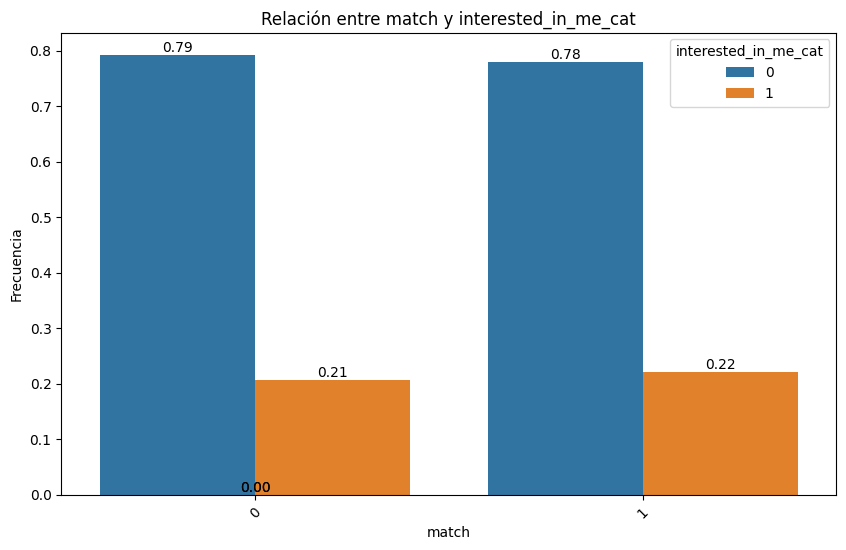

In [99]:
viz.plot_categorical_relationship_fin(train, target, "interested_in_me_cat", relative_freq=True, show_values=True)

No parece que sea nada informativa del target, voy a comprobar con el coeficiente de información mutua.

In [100]:
mutual_info_score(train[target], train.interested_in_me_cat)

np.float64(7.856787833893097e-05)

Efectivamente, esto me confirma que contiene muy poca información del target, ya que el valor es muy cercano a 0.

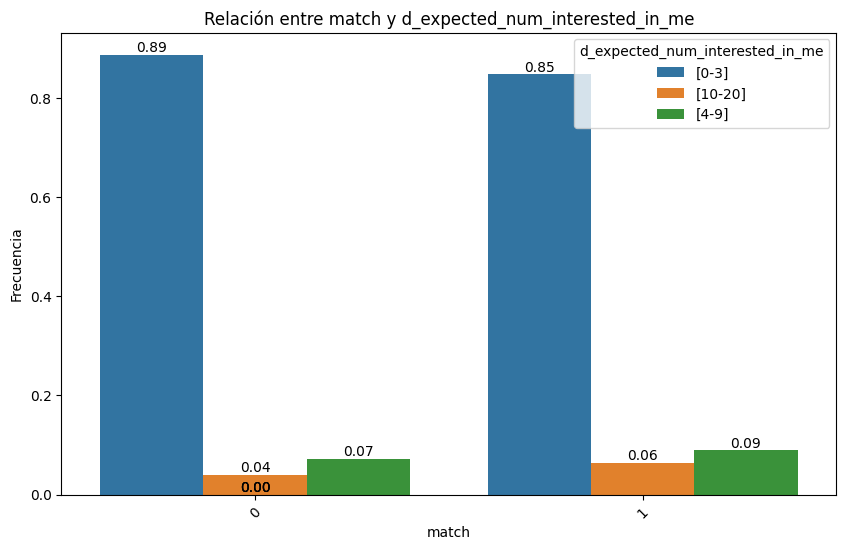

In [101]:
viz.plot_categorical_relationship_fin(train, target, "d_expected_num_interested_in_me", relative_freq=True, show_values=True)

No parece que sea nada informativa del target, voy a comprobar con el coeficiente de información mutua.

In [102]:
mutual_info_score(train[target], train.d_expected_num_interested_in_me)

np.float64(0.0011752745156286548)

Valor muy cercano a 0 también. Elimino las dos:

In [103]:
for col in train:
    if col.__contains__("interested_in_me"):
        train.drop(columns = col, inplace= True)
        columns_to_exclude.append(col)
print(train.shape)

(5026, 90)


#### **Selección de features**

Tres selectores que utilizan feature importance de modelos: RFE, RFECV y SelectFromModel, todos utilizando random forest

In [104]:
p_features = train.drop(columns=[target, "field"]).columns.to_list()
X_train = train[p_features].copy()
y_train = train[target]

In [105]:
cat_vars = [col for col in p_features if train[col].dtype == object]
num_vars = [col for col in p_features if col not in cat_vars]

In [106]:
print(len(cat_vars), len(num_vars))

43 45


In [107]:
for col in cat_vars:
    print(col, ":", train[col].unique())

gender : ['female' 'male']
d_dif_age : ['[4-6]' '[0-1]' '[7-37]' '[2-3]']
race : ['European/Caucasian-American' 'Asian/Pacific Islander/Asian-American'
 'Latino/Hispanic American' 'Other' 'Black/African American' '?']
race_o : ['European/Caucasian-American' 'Asian/Pacific Islander/Asian-American'
 'Latino/Hispanic American' 'Other' '?' 'Black/African American']
d_importance_same_race : ['[0-1]' '[6-10]' '[2-5]']
d_importance_same_religion : ['[0-1]' '[6-10]' '[2-5]']
d_pref_o_attractive : ['[21-100]' '[16-20]' '[0-15]']
d_pref_o_sincere : ['[21-100]' '[16-20]' '[0-15]']
d_pref_o_intelligence : ['[21-100]' '[16-20]' '[0-15]']
d_pref_o_funny : ['[16-20]' '[21-100]' '[0-15]']
d_pref_o_ambitious : ['[16-20]' '[0-15]' '[21-100]']
d_pref_o_shared_interests : ['[0-15]' '[16-20]' '[21-100]']
d_attractive_important : ['[16-20]' '[0-15]' '[21-100]']
d_sincere_important : ['[21-100]' '[16-20]' '[0-15]']
d_intellicence_important : ['[16-20]' '[21-100]' '[0-15]']
d_funny_important : ['[21-100]' '[1

In [108]:
[col for col in p_features if "[2-5]" in train[col].unique()]

['d_importance_same_race', 'd_importance_same_religion']

In [109]:
[col for col in cat_vars if col.__contains__("race")]

['race', 'race_o', 'd_importance_same_race']

In [110]:
o_encoder =OrdinalEncoder(categories = [["[0-15]", "[16-20]", "[21-100]"]])
o_encoder.fit_transform(X_train[["d_pref_o_ambitious"]])

array([[1.],
       [0.],
       [0.],
       ...,
       [2.],
       [0.],
       [0.]], shape=(5026, 1))

In [111]:
o_encoder.categories

[['[0-15]', '[16-20]', '[21-100]']]

In [112]:
[["[0-15]", "[16-20]", "[21-100]"]] * 2

[['[0-15]', '[16-20]', '[21-100]'], ['[0-15]', '[16-20]', '[21-100]']]

In [113]:
[col for col in p_features if "[0-15]" in train[col].unique()]

['d_pref_o_attractive',
 'd_pref_o_sincere',
 'd_pref_o_intelligence',
 'd_pref_o_funny',
 'd_pref_o_ambitious',
 'd_pref_o_shared_interests',
 'd_attractive_important',
 'd_sincere_important',
 'd_intellicence_important',
 'd_funny_important',
 'd_ambtition_important',
 'd_shared_interests_important']

In [114]:
list_100 = [col for col in p_features if "[0-15]" in train[col].unique()]
list_10 = [col for col in p_features if "[0-5]" in train[col].unique()]
list_10_2 = [col for col in p_features if "[2-5]" in train[col].unique()]
list_happy = ["d_expected_happy_with_sd_people"]
list_dif_age = ["d_dif_age"]
list_int_correlation = ["d_interests_correlate"]
list_exp_num_matches = ["d_expected_num_matches"]
list_gender = ["gender"]
cat_vars_pipeline = list_100 + list_10 + list_10_2 + list_happy + list_dif_age + list_int_correlation + list_exp_num_matches + list_gender

In [115]:
oh_categories = ['European/Caucasian-American', 'Asian/Pacific Islander/Asian-American',
 'Latino/Hispanic American', 'Other', 'Black/African American', '?']
oh_vars = []
for col in ["race", "race_o"]:
    for suf in oh_categories:
        oh_vars.append(f"{col}_{suf}")

In [118]:
[oh_categories] * 2

[['European/Caucasian-American',
  'Asian/Pacific Islander/Asian-American',
  'Latino/Hispanic American',
  'Other',
  'Black/African American',
  '?'],
 ['European/Caucasian-American',
  'Asian/Pacific Islander/Asian-American',
  'Latino/Hispanic American',
  'Other',
  'Black/African American',
  '?']]

In [1]:
preprocessing = ColumnTransformer(
    [("Categorical_Encoder_100", OrdinalEncoder(categories = [["[0-15]", "[16-20]", "[21-100]"]] * len(list_100) + [["[0-5]", "[6-8]", "[9-10]"]] * len(list_10) + [["[0-1]", "[2-5]", "[6-10]"]] * len(list_10_2) + [["[0-4]", "[5-6]", "[7-10]"]] + [["[0-1]", "[2-3]", "[4-6]", "[7-37]"]] + [["[-1-0]", "[0-0.33]", "[0.33-1]"]] + [["[0-2]", "[3-5]", "[5-18]"]] + [["male", "female"]]), cat_vars_pipeline),
     ("Categorical_Encoder_race", OneHotEncoder(categories=[oh_categories] * 2), ["race", "race_o"])],
     remainder= "passthrough"
)

preprocessing.fit(X_train)

NameError: name 'ColumnTransformer' is not defined

In [117]:
preprocessing = ColumnTransformer(
    [("Categorical_Encoder_100", OrdinalEncoder(categories = [["[0-15]", "[16-20]", "[21-100]"]] * len(lista_100) + [["[0-5]", "[6-8]", "[9-10]"]] * len(lista_10) + ), cat_vars_pipeline)],
     ("Categorical_Encoder_10", OrdinalEncoder(categories = [["[0-5]", "[6-8]", "[9-10]"]]), [col for col in p_features if "[0-5]" in train[col].unique()]),
     ("Categorical_Encoder_10_2", OrdinalEncoder(categories = [["[0-1]", "[2-5]", "[6-10]"]]), [col for col in p_features if "[2-5]" in train[col].unique()]),
     ("Categorical_Encoder_happy", OrdinalEncoder(categories = [["[0-4]", "[5-6]", "[7-10]"]]), ["d_expected_happy_with_sd_people"]),
     ("Categorical_Encoder_dif_age", OrdinalEncoder(categories = [["[0-1]", "[2-3]", "[4-6]", "[7-37]"]]), ["d_dif_age"]),
     ("Categorical_Encoder_int_correlation", OrdinalEncoder(categories = [["[-1-0]", "[0-0.33]", "[0.33-1]"]]), ["d_interests_correlate"]),
     ("Categorical_Encoder_exp_num_matches", OrdinalEncoder(categories = [["[0-2]", "[3-5]", "[5-18]"]]), ["d_expected_num_matches"]),
     ("Categorical_Encoder_gender", OrdinalEncoder(categories = [["male", "female"]]), ["gender"]),
     ("Categorical_Encoder_race", OneHotEncoder(), ["race", "race_o"])
     remainder= "passthrough"
)

preprocessing.fit(X_train)

SyntaxError: invalid syntax (127507420.py, line 2)

In [ ]:
X_train_processed = pd.DataFrame(preprocessing.transform(X_train), columns= cat_vars_pipeline + num_vars, index=X_train.index)
X_train_processed

ValueError: Shape of passed values is (5026, 98), indices imply (5026, 86)

In [ ]:
rf_select = RandomForestClassifier(max_depth= 8, random_state=42)
model_selector = SelectFromModel(estimator= rf_select, threshold= "median", max_features= 45)
rfe = RFE(estimator= rf_select, n_features_to_select= 45, step=1)
rfecv = RFECV(estimator= rf_select, cv= "balanced_accuracy")

for selector in [model_selector, rfe, rfecv]:
    selector.fit(X_train_transformed, y_train)
features_model = model_selector.get_feature_names_out()
features_rfe = pd.DataFrame(rfe.ranking_, columns=["ranking"], index = p_features).sort_values("ranking")
features_rfecv = pd.DataFrame(rfecv.ranking_, columns=["ranking"], index = p_features).sort_values("ranking")

ValueError: could not convert string to float: 'female'